##Tratamento de dados

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
dados = pd.read_csv('Customer-Churn-Records.csv')
dados.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
dados.shape

(10000, 18)

In [4]:
#renomeando as colunas
dicionario = {
    'RowNumber':'NumeroLinha',
    'CustomerId':'IdCliente',
    'Surname':'Sobrenome',
    'CreditScore':'HistCredito',
    'Geography':'Localidade',
    'Gender':'Genero',
    'Age':'Idade',
    'Tenure':'TempodeCasa',
    'Balance':'Saldo',
    'NumOfProducts':'NumdeProdutos',
    'HasCrCard':'TemCartaoCredito',
    'IsActiveMember':'ClienteAtivo',
    'EstimatedSalary':'EstimativaSalario',
    'Exited':'Saiu',
    'Complain':'Reclamacao',
    'Satisfaction Score':'ScoreSatisfacao',
    'Card Type':'TipodeCartao',
    'Point Earned':'QtdePontos'
}

dados.rename(columns=dicionario, inplace=True)
dados.head()

,NumeroLinha,IdCliente,Sobrenome,HistCredito,Localidade,Genero,Idade,TempodeCasa,Saldo,NumdeProdutos,TemCartaoCredito,ClienteAtivo,EstimativaSalario,Saiu,Reclamacao,ScoreSatisfacao,TipodeCartao,QtdePontos
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
dados['Genero'].unique()

#substituindo genero por 1 ou 0
genero = {
    'Female':0,
    'Male':1
}

dados['Sexo'] = dados['Genero'].map(genero)

In [6]:
dados.shape

(10000, 19)

In [7]:
dados.drop(columns=['NumeroLinha'], inplace=True)
dados.head()

,IdCliente,Sobrenome,HistCredito,Localidade,Genero,Idade,TempodeCasa,Saldo,NumdeProdutos,TemCartaoCredito,ClienteAtivo,EstimativaSalario,Saiu,Reclamacao,ScoreSatisfacao,TipodeCartao,QtdePontos,Sexo
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,0
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,0
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,0


In [91]:
dados.corr()

<ipython-input-91-27ee38a39a92>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.corr()


,IdCliente,HistCredito,Idade,TempodeCasa,Saldo,NumdeProdutos,TemCartaoCredito,ClienteAtivo,EstimativaSalario,Saiu,Reclamacao,ScoreSatisfacao,QtdePontos,Sexo
IdCliente,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006203,-0.007293,-0.000865,-0.013076,-0.002641
HistCredito,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077,-0.002857
Idade,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222,-0.027544
TempodeCasa,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196,0.014733
Saldo,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608,0.012087
NumdeProdutos,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330,-0.021859
TemCartaoCredito,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041,0.005766
ClienteAtivo,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983,0.022544
EstimativaSalario,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515,-0.008112
Saiu,-0.006203,-0.026771,0.285296,-0.013656,0.118577,-0.047611,-0.006976,-0.156356,0.012490,1.000000,0.995693,-0.005849,-0.004628,-0.106267


#Modelo SVC

<Axes: xlabel='Saiu', ylabel='count'>

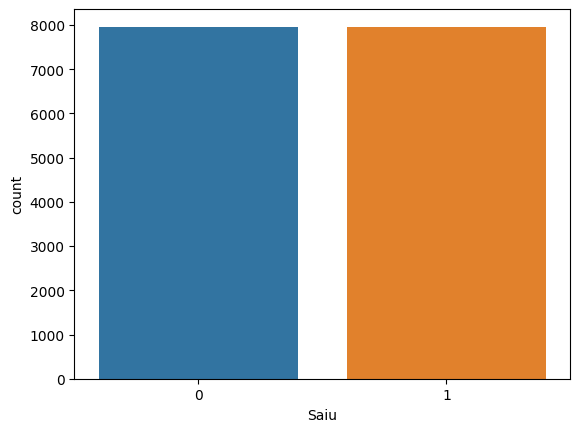

In [76]:
#equilibrando os dados
from imblearn.over_sampling import SMOTE
import numpy as np

y = dados['Saiu']
X = dados.drop(columns=['Saiu', 'TipodeCartao', 'Genero','Sobrenome', 'Localidade','IdCliente','Reclamacao'])

SEED = 123
np.random.RandomState(SEED)

smt = SMOTE()
X,y = smt.fit_resample(X,y)

df = pd.concat([X,y], axis=1)

#verificando se os dados estão bem distribuidos
sns.countplot(x='Saiu', data=df)

In [92]:
#criando dados de teste e treino
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#normalizando as variaveis X
modelo_ss = StandardScaler()
X_normalizado = modelo_ss.fit_transform(X)

SEED = 2811
np.random.RandomState(SEED)

X_train, X_test, y_train, y_test = train_test_split(X_normalizado,y,test_size=0.3, stratify=y)

In [78]:
from sklearn.svm import SVC

#X_train_novo, X_test_novo, y_train, y_test
modelo = SVC()
modelo.fit(X_train,y_train)

SVC()

In [79]:
y_previsto = modelo.predict(X_test)

In [80]:
score = modelo.score(X_train,y_train).round(3) * 100
print('O Score do modelo com os dados de treino foi de: {}'.format(score))

O Score do modelo com os dados de treino foi de: 84.8


In [81]:
from sklearn.metrics import accuracy_score
acuracia  = accuracy_score(y_test,y_previsto).round(5) * 100
print('O acuracia do modelo foi de: {}'.format(acuracia))

O acuracia do modelo foi de: 82.88


In [82]:
#utilizando a classe dummy, podemos verificar qual se irá mostrar se o nosso modelo não é baseline, #sempre escolher o mais alto
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(X_train, y_train)
previsoes = dummy_stratified.predict(X_test)

acuracia = accuracy_score(y_test, previsoes) * 100
print("A acurácia do dummy foi %.2f%%" % acuracia)

A acurácia do dummy foi 50.50%


In [83]:
from sklearn.metrics import recall_score
recall  = recall_score(y_test,y_previsto).round(5) * 100
print('O acuracia do modelo foi de: {}'.format(recall))

O acuracia do modelo foi de: 81.247


In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix=confusion_matrix(y_test, y_previsto)
print(confusion_matrix)

[[2019  370]
 [ 448 1941]]


##Testes Modelo SVC

In [24]:
entrada = dados.query('Reclamacao == 0 and Saiu == 1 ').head(20)
X_entrada = modelo_ss.transform(entrada.drop(columns=['Saiu', 'TipodeCartao', 'Genero','Sobrenome', 'Localidade','IdCliente', 'Reclamacao']))

modelo.predict(X_entrada)

array([1, 1, 1, 0])

In [25]:
dados.query('HistCredito == 608 and Idade==41')

,IdCliente,Sobrenome,HistCredito,Localidade,Genero,Idade,TempodeCasa,Saldo,NumdeProdutos,TemCartaoCredito,ClienteAtivo,EstimativaSalario,Saiu,Reclamacao,ScoreSatisfacao,TipodeCartao,QtdePontos,Sexo
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,0
206,15755262,McDonald,608,Spain,Female,41,3,89763.84,1,0,0,199304.74,1,1,3,PLATINUM,639,0
9074,15630413,Howarth,608,France,Female,41,5,0.00,2,1,1,72462.25,0,0,5,GOLD,445,0


In [26]:
HistCredito	= 608
Idade = 41
TempodeCasa = 1
Saldo = 83807.86
NumdeProdutos = 1
TemCartaoCredito = 0
ClienteAtivo = 1
EstimativaSalario = 112542.58
ScoreSatisfacao = 3
QtdePontos = 456
Sexo = 0

entrada = [[HistCredito,Idade,TempodeCasa,Saldo,NumdeProdutos,TemCartaoCredito,ClienteAtivo,EstimativaSalario,ScoreSatisfacao,QtdePontos,Sexo]]

X_entrada = modelo_ss.transform(entrada)

modelo.predict(X_entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1

In [27]:
entrada = dados.query('HistCredito == 608 and Idade==41')
X_entrada = modelo_ss.transform(entrada.drop(columns=['Saiu', 'TipodeCartao', 'Genero','Sobrenome', 'Localidade','IdCliente', 'Reclamacao']))

modelo.predict(X_entrada)

array([1, 1, 0])

In [23]:
entrada = df.query('Idade == 24 and NumdeProdutos==3 and ScoreSatisfacao==3 and Sexo==1').head(10)
X_entrada = modelo_ss.transform(entrada.drop(columns='Saiu'))

modelo.predict(X_entrada)[0]

0

#Modelo GaunssianNB

In [28]:
y_2 = dados['Saiu']
X_2 = dados.drop(columns=['Saiu', 'TipodeCartao', 'Genero','Sobrenome', 'Localidade','IdCliente','Reclamacao'])

In [ ]:
#equilibrando os dados
from imblearn.over_sampling import SMOTE
import numpy as np

y = dados['Saiu']
X = dados.drop(columns=['Saiu', 'TipodeCartao', 'Genero','Sobrenome', 'Localidade','IdCliente','Reclamacao'])

SEED = 123
np.random.RandomState(SEED)

smt = SMOTE()
X2,y2 = smt.fit_resample(X,y)

df2 = pd.concat([X2,y2], axis=1)

#verificando se os dados estão bem distribuidos
sns.countplot(x='Saiu', data=df2)

In [48]:
#criando dados de teste e treino
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#normalizando as variaveis X
modelo_ss = StandardScaler()
X_normalizado = modelo_ss.fit_transform(X2)

SEED = 2811
np.random.RandomState(SEED)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_normalizado,y2,test_size=0.3)

In [57]:
from sklearn.naive_bayes import GaussianNB

#X_train_novo, X_test_novo, y_train, y_test
modelo_GNB = GaussianNB()
modelo_GNB.fit(X_train2,y_train2)

GaussianNB()

In [64]:
y_previsto2 = modelo_GNB.predict(X_test2)

In [65]:
score = modelo_GNB.score(X_train2,y_train2).round(3) * 100
print('O Score do modelo com os dados de treino foi de: {}'.format(score))

O Score do modelo com os dados de treino foi de: 79.80000000000001


In [66]:
from sklearn.metrics import accuracy_score
acuracia  = accuracy_score(y_test2,y_previsto2).round(5) * 100
print('O acuracia do modelo foi de: {}'.format(acuracia))

O acuracia do modelo foi de: 79.594


In [67]:
from sklearn.metrics import recall_score
recall  = recall_score(y_test2,y_previsto2).round(5) * 100
print('O acuracia do modelo foi de: {}'.format(recall))

O acuracia do modelo foi de: 79.181


In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix=confusion_matrix(y_test2, y_previsto2)
print(confusion_matrix)

[[1928  482]
 [ 493 1875]]


##Teste do Modelo GaussianNB

In [86]:
entrada = dados.query('Reclamacao == 0 and Saiu == 1 ').head(20)
X_entrada = modelo_ss.transform(entrada.drop(columns=['Saiu', 'TipodeCartao', 'Genero','Sobrenome', 'Localidade','IdCliente', 'Reclamacao']))

modelo_GNB.predict(X_entrada)

array([1, 1, 1, 0])

In [87]:
dados.query('HistCredito == 608 and Idade==41')

,IdCliente,Sobrenome,HistCredito,Localidade,Genero,Idade,TempodeCasa,Saldo,NumdeProdutos,TemCartaoCredito,ClienteAtivo,EstimativaSalario,Saiu,Reclamacao,ScoreSatisfacao,TipodeCartao,QtdePontos,Sexo
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,0
206,15755262,McDonald,608,Spain,Female,41,3,89763.84,1,0,0,199304.74,1,1,3,PLATINUM,639,0
9074,15630413,Howarth,608,France,Female,41,5,0.00,2,1,1,72462.25,0,0,5,GOLD,445,0


In [88]:
HistCredito	= 608
Idade = 41
TempodeCasa = 1
Saldo = 83807.86
NumdeProdutos = 1
TemCartaoCredito = 0
ClienteAtivo = 1
EstimativaSalario = 112542.58
ScoreSatisfacao = 3
QtdePontos = 456
Sexo = 0

entrada = [[HistCredito,Idade,TempodeCasa,Saldo,NumdeProdutos,TemCartaoCredito,ClienteAtivo,EstimativaSalario,ScoreSatisfacao,QtdePontos,Sexo]]

X_entrada = modelo_ss.transform(entrada)

modelo.predict(X_entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1

In [89]:
entrada = dados.query('HistCredito == 608 and Idade==41')
X_entrada = modelo_ss.transform(entrada.drop(columns=['Saiu', 'TipodeCartao', 'Genero','Sobrenome', 'Localidade','IdCliente', 'Reclamacao']))

modelo.predict(X_entrada)

array([1, 1, 0])

In [90]:
entrada = df.query('Idade == 24 and NumdeProdutos==3 and ScoreSatisfacao==3 and Sexo==1').head(10)
X_entrada = modelo_ss.transform(entrada.drop(columns='Saiu'))

modelo.predict(X_entrada)[0]

1

#Concluimos que o Melhor modelo é o de SVC, pois sua acurracia e recall está mais factível